<a href="https://colab.research.google.com/github/sayantikag98/Depression_Analysis/blob/master/Depression_analysis_from_tweets_(Model_Building).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

In [3]:
import pandas as pd
df_combined=pd.read_csv('drive/My Drive/pre_final1.csv',parse_dates=['date'],encoding='utf-8')

In [4]:
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266472,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266473,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266474,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266475,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [5]:
df_combined.shape[0]-df_combined.stemming_stopwordsRemoved.isna().sum()    ### to check for the number of non-null rows according to a particular column

266329

In [6]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()    ### to check for the number of null rows

148

In [7]:
df_combined.dropna(subset=['stemming_stopwordsRemoved'],inplace=True)    ### to drop the rows containing null values

In [8]:
df_combined.reset_index(inplace=True,drop=True)
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266324,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266325,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266326,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266327,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesomeness,"['#', 'nowplaying', 'gareth', 'emery', '-', 'e...",nowplay gareth emeri exposur awesom,nowplaying gareth emery exposure awesomeness


In [9]:
df_combined.stemming_stopwordsRemoved.isna().sum()     ### final check on null value rows

0

In [10]:
df_combined.lemmatized_stopwordsRemoved.isna().sum()

0

In [11]:
sentences=df_combined.stemming_stopwordsRemoved.tolist()     ### to convert a particular column into a list

In [12]:
sentences1=df_combined.lemmatized_stopwordsRemoved.tolist()

# **BAG OF WORDS**

In [13]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(max_features=2500)
# X1=cv.fit_transform(sentences).toarray()   ### for stemming
# X1   ### array of features

In [14]:
# print(cv.get_feature_names())  ### to get the feature names      ###### for stemming
# print(cv.get_params())

In [15]:
# df_bow=pd.DataFrame(X1,columns=cv.get_feature_names())
# df_bow

In [16]:
# X1_1=cv.fit_transform(sentences1).toarray()    ### for lemmatization
# X1_1

In [17]:
# print(cv.get_feature_names())  ### for lemmatization

In [18]:
# X1.shape

# **TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY**

In [19]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf=TfidfVectorizer(max_features=1000)
# X2=tfidf.fit_transform(sentences).toarray()     ### for stemming
# X2   ### array of features

In [20]:
# print(tfidf.get_feature_names())   ### to get the feature names

In [21]:
# X2_1=tfidf.fit_transform(sentences1).toarray()    ### lemmatization
# X2_1

In [22]:
# print(tfidf.get_feature_names())

# **WORD2VEC**

In [23]:
from gensim.models import Word2Vec
import re
from nltk.corpus import stopwords

In [24]:
senten=[]

In [25]:
for i in range(len(df_combined.text)):
  words=re.sub("[^A-Za-z]"," ",df_combined.text[i])
  words=words.lower()
  senten.append(words)

In [26]:
senten_1=[]

for i in range(len(senten)):
  words=[]
  for word in senten[i].split():
    if (word not in set (stopwords.words('english'))):  
      words.append(word)
  senten_1.append(list(words))


In [27]:
nltk.word_tokenize(senten[7])

['please', 'say', 'something', 'for', 'amaal', 'mallik', 'askshreya']

In [28]:
senten_1[7]

['please', 'say', 'something', 'amaal', 'mallik', 'askshreya']

In [30]:
df_combined.insert(13, "sentences_Modified", senten_1)
df_combined

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink,sentences,sentences_Modified,text_tokenized,stemming_stopwordsRemoved,lemmatized_stopwordsRemoved
0,2020-08-14 23:40:49,DalrympleWill,HearaichHerald,2,0,3,Andrew do send me a copy! Love to read it,NaN,NaN,NaN,1294418731251138562,https://twitter.com/DalrympleWill/status/12944...,Andrew do send me a copy! Love to read it,"[andrew, send, copy, love, read]","['Andrew', 'do', 'send', 'me', 'a', 'copy', '!...",andrew send copi love read,andrew send copy love read
1,2020-08-14 23:29:59,lostboy54,ishkarnBHANDARI,10,85,403,This is all coming true. You were right @ishka...,NaN,@ishkarnBHANDARIhttps,NaN,1294416005674889216,https://twitter.com/lostboy54/status/129441600...,This is all coming true. You were right @ishka...,"[coming, true, right, ishkarnbhandarihttps, tw...","['This', 'is', 'all', 'coming', 'true', '.', '...",come true right ishkarnbhandarihttp twitter co...,coming true right ishkarnbhandarihttps twitter...
2,2020-08-14 23:27:45,srijanpalsingh,NaN,3,34,151,Wishing everyone a very happy Independence Day...,NaN,NaN,#India #JaiHind #Kalam #IndependenceDay #Indep...,1294415445609472000,https://twitter.com/srijanpalsingh/status/1294...,Wishing everyone a very happy Independence Day...,"[wishing, everyone, happy, independence, day, ...","['Wishing', 'everyone', 'a', 'very', 'happy', ...",wish everyon happi independ day time gratitud ...,wishing everyone happy independence day time g...
3,2020-08-14 23:09:49,AAlHamoud7,NaN,0,0,7,"I don’t usually approach first, so when I do, ...",NaN,NaN,NaN,1294410930458173440,https://twitter.com/AAlHamoud7/status/12944109...,"I don’t usually approach first, so when I do, ...","[usually, approach, first, probably, special]","['I', 'don', '’', 't', 'usually', 'approach', ...",usual approach first probabl special,usually approach first probably special
4,2020-08-14 22:21:57,MeerraChopra,NaN,28,19,278,#GunjanSaxena is such a brilliant film that ul...,NaN,@TripathiiPankaj,#GunjanSaxena #jhanvikapoor #sharansharma,1294398885654220800,https://twitter.com/MeerraChopra/status/129439...,#GunjanSaxena is such a brilliant film that ul...,"[gunjansaxena, brilliant, film, ull, get, adre...","['#', 'GunjanSaxena', 'is', 'such', 'a', 'bril...",gunjansaxena brilliant film ull get adrenalin ...,gunjansaxena brilliant film ull get adrenaline...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266324,2010-09-14 07:26:25,krist0ph3r,NaN,0,0,0,"I stand corrected. there is, indeed, a vaccine...",NaN,@mizarcle,NaN,24456504000,https://twitter.com/krist0ph3r/status/24456504000,"I stand corrected. there is, indeed, a vaccine...","[stand, corrected, indeed, vaccine, cervical, ...","['I', 'stand', 'corrected', '.', 'there', 'is'...",stand correct inde vaccin cervic cancer except...,stand corrected indeed vaccine cervical cancer...
266325,2010-09-14 07:15:04,krist0ph3r,NaN,0,0,0,#iWant! RT @24HoursLoot The Four Elements of a...,NaN,@24HoursLoot,#iWant,24456008845,https://twitter.com/krist0ph3r/status/24456008845,#iWant! RT @24HoursLoot The Four Elements of a...,"[iwant, rt, hoursloot, four, elements, human, ...","['#', 'iWant', '!', 'RT', '@', '24HoursLoot', ...",iwant rt hoursloot four element human geek lif...,iwant rt hoursloot four element human geek lif...
266326,2010-09-14 07:12:15,krist0ph3r,NaN,0,0,0,there's a vaccine? don't think cancer can be v...,NaN,@mizarcle,NaN,24455883030,https://twitter.com/krist0ph3r/status/24455883030,there's a vaccine? don't think cancer can be v...,"[vaccine, think, cancer, vaccinated, rt, mizar...","['there', ""'s"", 'a', 'vaccine', '?', 'do', ""n'...",vaccin think cancer vaccin rt mizarcl anyon ta...,vaccine think cancer vaccinated rt mizarcle an...
266327,2010-09-14 07:10:56,krist0ph3r,NaN,0,0,0,#nowplaying gareth emery - exposure #awesomeness,NaN,NaN,#nowplaying #awesomeness,24455823620,https://twitter.com/krist0ph3r/status/24455823620,#nowplaying gareth emery - exposure #awesome

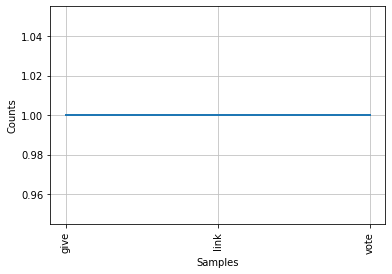

In [37]:
count_plot=nltk.FreqDist(senten_1[108])
count_plot.plot()

In [38]:
## Training the Word2Vec model
model=Word2Vec(senten_1,min_count=1) ### min_count kept 1 so that no word is ignored

In [39]:
print(model) ## to print the summary of the model

Word2Vec(vocab=252218, size=100, alpha=0.025)


In [71]:
word=list(model.wv.vocab)   ### to print the summary of the vocab
word[0]

'andrew'

In [82]:
X = model[model.wv.vocab]
X.shape

(252218, 100)

In [83]:
#for i,val in enumerate(word):
df_word2vec=pd.DataFrame(X)


In [84]:
df_word2vec.insert(0,'Vocab_name',word)
df_word2vec.set_index('Vocab_name')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
Vocab_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
andrew,-0.298687,0.004728,0.299817,0.205188,-0.148721,-0.270015,0.014244,-0.030541,-0.094184,-0.033657,0.150422,0.364676,-0.230551,0.094350,-0.058496,-0.046773,-0.029052,0.379277,0.226004,0.208674,0.001055,-0.108485,-0.280217,0.500408,0.199069,0.388708,-0.039562,0.242948,-0.078594,-0.022180,0.063196,0.165326,-0.087780,-0.089712,-0.006868,0.080991,-0.039666,0.224852,0.126330,0.123895,...,0.375002,-0.039871,-0.074491,0.059619,-0.012929,0.015665,-0.024462,-0.171554,-0.297267,-0.111396,0.159639,0.040481,0.015048,-0.011609,-0.126420,-0.089660,0.065125,-0.013297,0.138280,0.194959,-0.051567,-0.245142,-0.043976,0.016563,0.286782,0.058494,-0.311009,0.244099,0.139671,0.303003,0.139192,-0.365712,-0.133002,0.155623,0.100621,-0.083740,-0.057961,0.345559,-0.180369,0.156485
send,0.089820,-1.776602,0.748704,-0.121847,0.699089,0.761828,0.133197,-0.705562,-0.368493,-0.051091,-0.224387,-0.193271,0.310638,0.752761,0.002074,1.347601,0.147514,-0.392078,-0.165980,0.712864,-0.429426,0.775976,-0.570092,0.764158,-0.390138,-0.732702,-0.024015,0.915094,0.383268,1.236662,-1.204639,-1.705061,0.619080,0.368545,-0.894746,2.427487,0.873917,-0.400734,-0.688225,1.780034,...,0.551611,-0.005645,-0.506840,-0.666666,-0.111846,0.339359,0.255999,-1.203126,0.935861,-0.177049,-0.492941,0.172540,1.441783,0.673569,-1.951463,-0.880394,0.534878,-0.781412,-1.316972,0.421619,0.624150,-2.321727,-0.804161,-1.012122,-0.138644,-0.826286,-0.097966,0.406366,0.815373,0.172914,-0.123035,0.225540,2.172514,-0.237749,-0.372499,0.337681,-2.067771,0.285984,0.194484,-0.762470
copy,-0.184738,-0.319995,1.023867,0.612928,0.882187,0.369628,-0.277399,-0.485826,-0.300776,0.300847,-0.852262,-0.838918,0.333531,0.302981,0.415616,0.590768,-0.119247,0.302605,-0.554380,0.040799,-0.537325,0.380877,-0.024788,0.145130,-0.022191,-0.020729,-0.070257,0.901654,-0.035136,0.586453,0.016783,-0.684782,0.095146,-0.195638,-0.179755,1.426430,0.735423,0.259001,0.463627,0.774294,...,0.800637,0.701975,-0.389775,-0.279330,-0.610244,0.890660,-0.269176,-0.777722,0.415086,-0.950307,0.003927,-0.742036,0.672275,0.199540,-1.846614,-0.297118,-0.094155,-0.706613,-0.487398,1.276943,0.268097,-1.951692,-0.221193,0.190942,-0.480094,-0.468079,-0.609236,0.405040,0.717960,0.197425,0.324082,0.376969,1.029781,-0.384977,-0.334418,-0.112815,-0.271736,-0.116476,-0.648042,-0.572356
love,1.443578,-0.770283,-0.504489,2.039378,3.128022,2.568317,1.669997,-1.645386,-0.208421,-2.210040,-0.223820,1.383433,0.053260,-0.274637,1.993517,3.651677,-0.949319,3.092586,-1.636126,3.255868,3.713363,0.954741,-1.040448,1.106573,2.174574,0.678527,-1.433196,1.827429,0.413444,1.474335,0.079769,-0.604274,0.729195,-0.789235,-2.424370,2.028389,0.317396,-1.224562,0.208264,-0.169256,...,-0.103458,1.949794,1.022181,0.279810,-1.514029,0.250017,-0.874534,-1.737205,-1.087450,1.325764,1.348059,1.029312,1.131732,-1.049380,0.068951,1.148371,-0.910380,0.743392,-2.175272,0.473506,1.934013,-1.243618,1.695450,-1.039468,-0.484754,-2.560353,2.508536,-1.932147,-0.610418,-0.362222,0.513751,0.808403,1.426287,-1.817578,-1.939396,-1.938930,-0.118282,0.043243,0.863219,-0.471982
read,0.417527,-1.127995,2.476143,1.292308,1.735321,0.050031,-0.937861,-1.707204,0.697267,0.316613,-2.359515,-2.078639,1.887715,1.575590,0.855013,1.010732,0.459713,-0.832440,1.122457,0.720424,-2.483025,-0.686604,0.723988,0.109623,-0.569030,-0.027266,0.199793,1.483790,-0.133217,0.158271,-0.990379,-1.300415,0.544598,0.016613,1.711247,4.558574,1.637858,0.368953,0.208259,0.513811,...,1.293516,2.237192,-0.702959,0.087863,-2.399570,1.145597,-1.495260,0.476374,-0.293624,0.858795,-0.637436,-0.548083,0.132142,0.357129,-2.752755,-1.314816,-0.105539,-2.493767,-2.107728,1.840688,-0.552625,-1.687564,-1.5

In [41]:
## to find the vector for a particular word
vector=model['depression']
vector

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.02779149,  0.4005242 ,  1.1339114 ,  0.6431422 ,  0.66040486,
       -0.2237244 ,  0.26953435,  0.09132891,  0.57586586, -0.40601596,
       -0.33349147, -0.13199934, -0.31275672,  0.15356663,  0.20110609,
        0.30561975, -0.16808505,  0.05875108, -0.00229462,  0.12986156,
       -0.05961484, -0.46163622, -0.34537968, -0.03147161, -0.24909945,
        0.93052053,  0.13781232,  0.32408223,  0.37316227,  0.20138438,
       -0.30109814, -0.6343093 , -0.10419817, -0.3729538 , -0.11109746,
        1.3053607 , -0.5249918 , -0.5141985 ,  0.11869153,  0.30731893,
       -0.37885502,  0.17650105, -0.8448408 ,  0.5814618 ,  0.01174737,
       -0.25128222,  0.8596536 , -0.19751257,  0.7535883 ,  0.19175965,
       -0.19300188,  0.34256724, -0.6693563 ,  0.16309427,  0.22969703,
       -0.14500433, -0.38990954,  0.23901655, -0.84842783,  0.9111417 ,
       -0.02244764,  0.8239752 , -0.6339001 ,  0.01263704, -0.4076201 ,
        0.26464334, -0.47964886, -0.74190307,  0.12558897,  0.45

In [42]:
model.wv.save_word2vec_format('model.txt',binary=False) ## to save the model

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [44]:
## to find similar words to the words commonly used by people in depression in their tweets
keyword = ["depression","depressed","anxiety","overwhelmed","exhausted","distressed","anxious","tired","low","discouraged","desperate","insomnia","cry","nervous","worried","lonely","sad","empty"]

### word "demotivated" is not there in the dictionary
import warnings
warnings.filterwarnings("ignore")
similar=[]
for i in keyword:
  similar.append(model.wv.most_similar(i))


In [45]:
### to merge all the similar words into one list
import itertools 

merged = list(itertools.chain.from_iterable(similar))
mergedList=list(set (merged))
print(len(mergedList))

180


In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
### to visualize the word vectors using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# to fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df_pca=pd.DataFrame({'pca_component_1':result[:,0],'pca_component_2':result[:,1]})
df_pca


Explained variation per principal component: [0.3640903  0.12339789]


,pca_component_1,pca_component_2
0,0.964365,1.067948
1,4.951352,-2.041615
2,3.428610,0.664032
3,5.871652,1.920101
4,5.831551,-2.381582
...,...,...
252213,-0.233949,-0.090667
252214,-0.226412,-0.100959
252215,-0.181640,-0.097700
252216,-0.225547,-0.046261


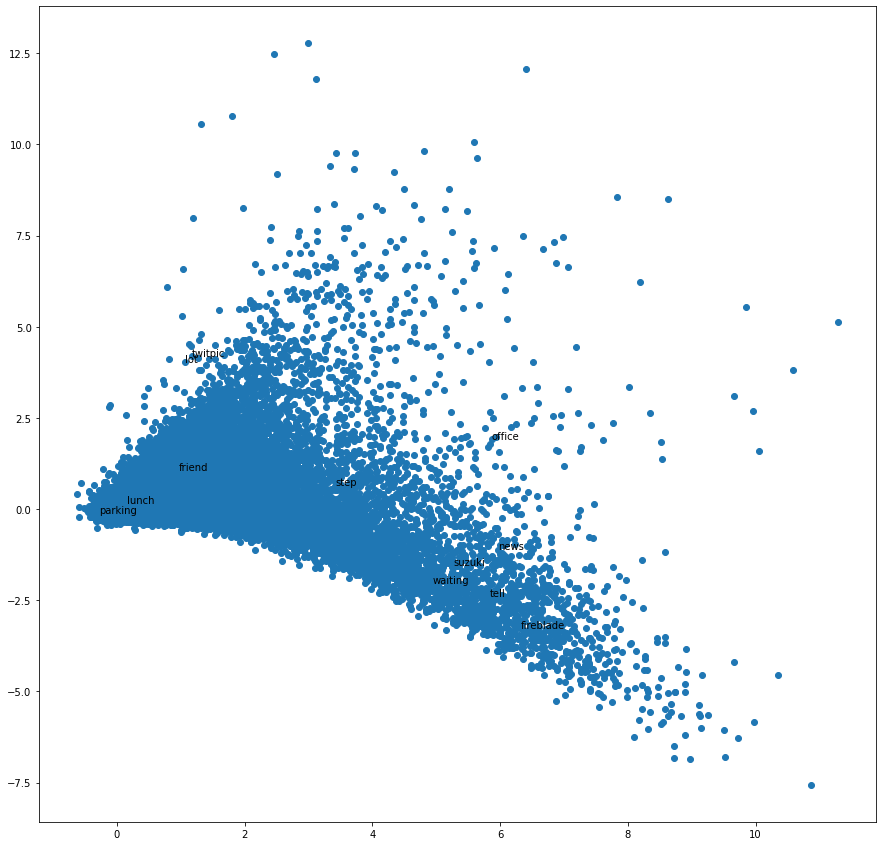

In [51]:
# create a scatter plot of the projection
plt.figure(figsize=(15,15))
plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()